In [1]:
import numpy as np
import importlib
import matplotlib.pyplot as plt

plt.style.use(["science", "grid"])  # Need SciencePlots pip package
import torch

import matplotlib
matplotlib.rcParams.update(
    {
        "font.family": "serif",
        "font.size": 14,
        "text.usetex": False,
    }
)

In [17]:
model_path_standalone = "logs/slot-attention-set-pred-shapeworld_7" 
models_standalone = torch.load(model_path_standalone)

model_path_splash = "../spnasp_slot_attention_shapeworld4/data/shapeworld4_fast/spn_slot_models.pt" 
models_splash = torch.load(model_path_splash)
print(models_splash.keys())

dict_keys(['shape_net', 'color_net', 'shade_net', 'size_net', 'slot_net', 'resume', 'test_ll_list', 'test_ap_list', 'test_metric_list', 'lr_list', 'num_params', 'time', 'exp_dict', 'program'])


In [22]:
ap_list_standalone = np.array(models_standalone['ap_list']).squeeze()
ap_list_splash = np.array(models_splash['test_ap_list'])
print(ap_list_splash.shape)

(1000, 6)


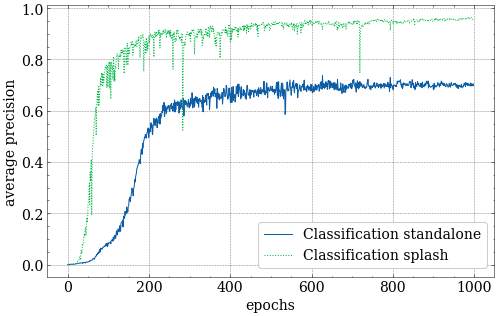

In [26]:

x= 1000


fig, ax = plt.subplots(1, figsize=(8,5))


ax.set_xlabel("epochs")
ax.set_ylabel("average precision")

#ap, ap_c, ap_s, ap_h, ap_x, e

ax.plot(ap_list, label="Classification standalone", linestyle='solid')
ax.plot(ap_list_splash[:x,5], ap_list_splash[:x,0], label="Classification splash", linestyle='dotted')



fig.legend(loc='lower right', bbox_to_anchor=(0.5, 0.13, 0.4, 0.2))
fig.savefig('plots/ap_standalone_vs_splash.svg', format="svg")

plt.show()